In [1]:
import pandas as pd

df = pd.read_csv('MSFT-2.csv')

df


,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060055,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062199,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063272,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061663,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060591,47894400
...,...,...,...,...,...,...,...
9631,2024-05-31,416.750000,416.750000,404.510010,415.130005,415.130005,47995300
9632,2024-06-03,415.529999,416.429993,408.920013,413.519989,413.519989,17484700
9633,2024-06-04,412.429993,416.440002,409.679993,416.070007,416.070007,14348900
9634,2024-06-05,417.809998,424.079987,416.299988,424.010010,424.010010,16988000


In [2]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [3]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9631   2024-05-31
9632   2024-06-03
9633   2024-06-04
9634   2024-06-05
9635   2024-06-06
Name: Date, Length: 9636, dtype: datetime64[ns]

In [4]:
df.index = df.pop('Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060055,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062199,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063272,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061663,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060591,47894400
...,...,...,...,...,...,...
2024-05-31,416.750000,416.750000,404.510010,415.130005,415.130005,47995300
2024-06-03,415.529999,416.429993,408.920013,413.519989,413.519989,17484700
2024-06-04,412.429993,416.440002,409.679993,416.070007,416.070007,14348900


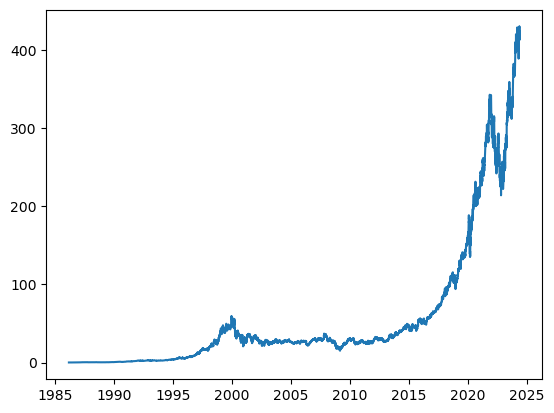

In [5]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [6]:
import numpy as np
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df, '2023-01-01','2024-06-06',n=3)

In [7]:
windowed_df


,Target Date,Target-3,Target-2,Target-1,Target
0,2023-01-01,236.960007,234.529999,241.009995,239.820007
1,2023-01-04,241.009995,239.820007,239.580002,229.100006
2,2023-01-05,239.820007,239.580002,229.100006,222.309998
3,2023-01-06,239.580002,229.100006,222.309998,224.929993
4,2023-01-09,229.100006,222.309998,224.929993,227.119995
...,...,...,...,...,...
354,2024-05-31,430.320007,429.170013,414.670013,415.130005
355,2024-06-03,429.170013,414.670013,415.130005,413.519989
356,2024-06-04,414.670013,415.130005,413.519989,416.070007
357,2024-06-05,415.130005,413.519989,416.070007,424.010010


In [8]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((359,), (359, 3, 1), (359,))

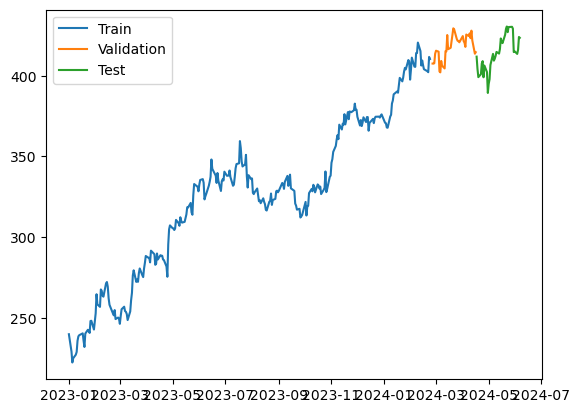

In [9]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 108411.1562 - mean_absolute_error: 325.7213 - val_loss: 174033.6406 - val_mean_absolute_error: 417.1042
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 104993.6875 - mean_absolute_error: 320.3577 - val_loss: 173439.8125 - val_mean_absolute_error: 416.3917
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 105566.1250 - mean_absolute_error: 321.5453 - val_loss: 172702.1875 - val_mean_absolute_error: 415.5050
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 107610.9453 - mean_absolute_error: 324.6165 - val_loss: 171639.5000 - val_mean_absolute_error: 414.2242
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 104478.8203 - mean_absolute_error: 319.8340 - val_loss: 170236.6094 - val_mean_absolute_error: 412.5273
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 103796.8984 - mean_absolute_error: 318.4633 - val_loss: 168095.3125 - val_mean_absolute_error: 409.9238
Epoch 7/100
9/9 ━━━━━━━━━━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


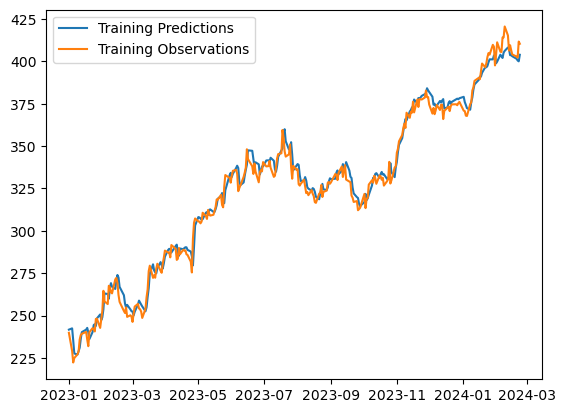

In [11]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


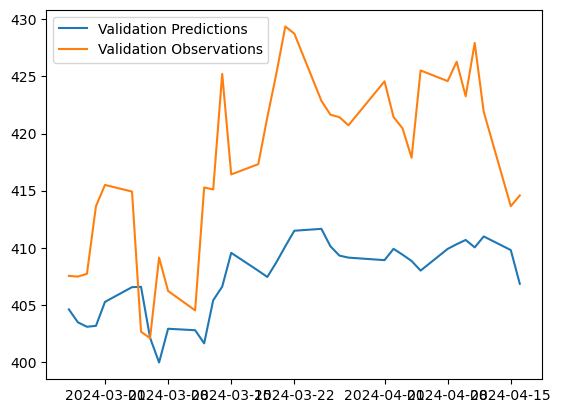

In [12]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


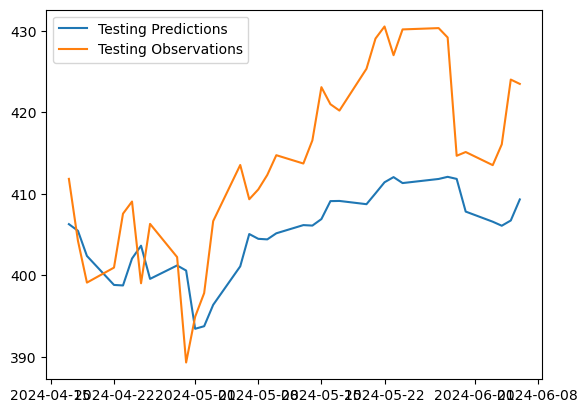

In [13]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

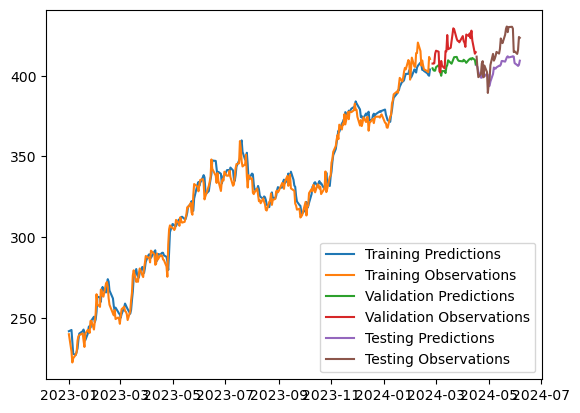

In [14]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [15]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━

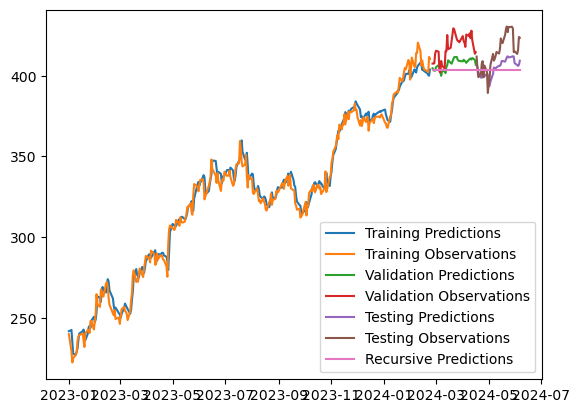

In [16]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

In [17]:
model.save('Stock_Predictions_Model.keras')